In [1]:
import os
import pandas as pd
import csv
import pre_proc_depth_id as pre

def open_csv(proc_file):
    # data = pre.data_to_proc(proc_file, proc_fields)
    # this is the consolidated csv just read each line
    data_b = os.path.join(os.getcwd(), "input", proc_file)
    return pd.read_csv(data_b)


# fields = ['date', 'lat', 'long', 'Depthm', 'T_degC', 'Salnty']
csv_data_new = open_csv("data_everything.csv")

In [19]:
df = csv_data_new

depth_1 = 50
depth_2 = 100

cond_1 = df.Depthm.between(depth_1,depth_2)
cond_2 = df.date.str.startswith("1949")
cond_3 = (df.Salnty.notnull() & df.T_degC.notnull())
result = df.loc[cond_1 &  cond_2 & cond_3]




print(result)
print("++++++++++++++++")
print(len(result.index))

          date        lat        long  Depthm  T_degC  Salnty
7      1949-03  38.786665 -124.073108      50   10.24  33.424
8      1949-03  38.786665 -124.073108      58   10.06  33.420
9      1949-03  38.786665 -124.073108      75    9.86  33.494
10     1949-03  38.786665 -124.073108      78    9.83  33.510
11     1949-03  38.786665 -124.073108     100    9.67  33.580
...        ...        ...         ...     ...     ...     ...
28032  1949-11  33.903590 -120.702353     100    9.08  33.738
28060  1949-11  33.091154 -119.051503      50   11.16  33.070
28061  1949-11  33.091154 -119.051503      75   10.20  33.349
28062  1949-11  33.091154 -119.051503      78   10.09  33.370
28063  1949-11  33.091154 -119.051503     100    9.34  33.660

[4167 rows x 6 columns]
++++++++++++++++
4167


In [3]:
import folium
import pandas as pd
import folium.plugins
import math
import branca
import branca.colormap as cm

# building color scale 
#s_min,s_max = csv_data_new['Salnty'].agg(['min','max'])
s_min,s_max = result['T_degC'].agg(['min','max'])
# adjust scale
s_max = s_max + 1
s_min = s_min - 1

cali_map = folium.Map(location=[38.78666543,-124.0731082])
colormap = cm.LinearColormap(colors=['yellow','black'], index=[s_min,s_max],vmin=s_min,vmax=s_max)

# csv_header = ['year', 'month', 'lat', 'long', 'Depthm', 'T_degC', 'Salnty']
for i, r in result.iterrows():
        #setting for the popup
    lat = r['lat']
    long = r['long']
    #salt = r['Salnty']   
    salt = r['T_degC']
 
 
    # make sure "lat" then "long"
    # silly mistake
    folium.Circle( (lat, long), 
                   radius=1,
                   fill=True,
                   color=colormap(salt) 
                   ).add_to(cali_map)

cali_map.add_child(colormap)



In [4]:

def dots_on_a_map(df, target_inspection, year,depth):
    import folium
    import folium.plugins
    import branca.colormap as cm
    import os

    # builds map structure
    cali_map = folium.Map(location=[38.78666543, -124.0731082])

    # builds color scale
    s_min, s_max = df[target_inspection].agg(['min', 'max'])
    # adjust scale to add slight buffer either end
    s_max = s_max + 1
    s_min = s_min - 1
    
    colormap = cm.linear.YlOrBr_09.scale(s_min, s_max)
    colormap.caption = target_inspection + ' for '+ year + ' at ' + str(depth) + ' meters'

    for i, r in df.iterrows():
        # setting for the popup
        lat = r['lat']
        long = r['long']
        to_be_inspected = r[target_inspection]

        # make sure "lat" then "long"
        # silly mistake
        folium.Circle((lat, long),
                      radius=1,
                      fill=True,
                      color=colormap(to_be_inspected)
                      ).add_to(cali_map)

    # does not work inside of function but will work in notebook
    cali_map.add_child(colormap)
    
    # saving output as html 
    # saving map as png, has issues with zoom 
    fn= target_inspection + '_'+ year + '_'+ str(depth)  +'.html'
    cali_map.save(fn)
    
 
    
dots_on_a_map(result, 'Salnty','1949',depth_2)



In [43]:
df.head(10)

,date,lat,long,Depthm,T_degC,Salnty,dated
0,1949-03,38.786665,-124.073108,0,10.50,33.440,1949-03-01
1,1949-03,38.786665,-124.073108,8,10.46,33.440,1949-03-01
2,1949-03,38.786665,-124.073108,10,10.46,33.437,1949-03-01
3,1949-03,38.786665,-124.073108,19,10.45,33.420,1949-03-01
4,1949-03,38.786665,-124.073108,20,10.45,33.421,1949-03-01
5,1949-03,38.786665,-124.073108,30,10.45,33.431,1949-03-01
6,1949-03,38.786665,-124.073108,39,10.45,33.440,1949-03-01
7,1949-03,38.786665,-124.073108,50,10.24,33.424,1949-03-01
8,1949-03,38.786665,-124.073108,58,10.06,33.420,1949-03-01
9,1949-03,38.786665,-124.073108,75,9.86,33.494,1949-03-01


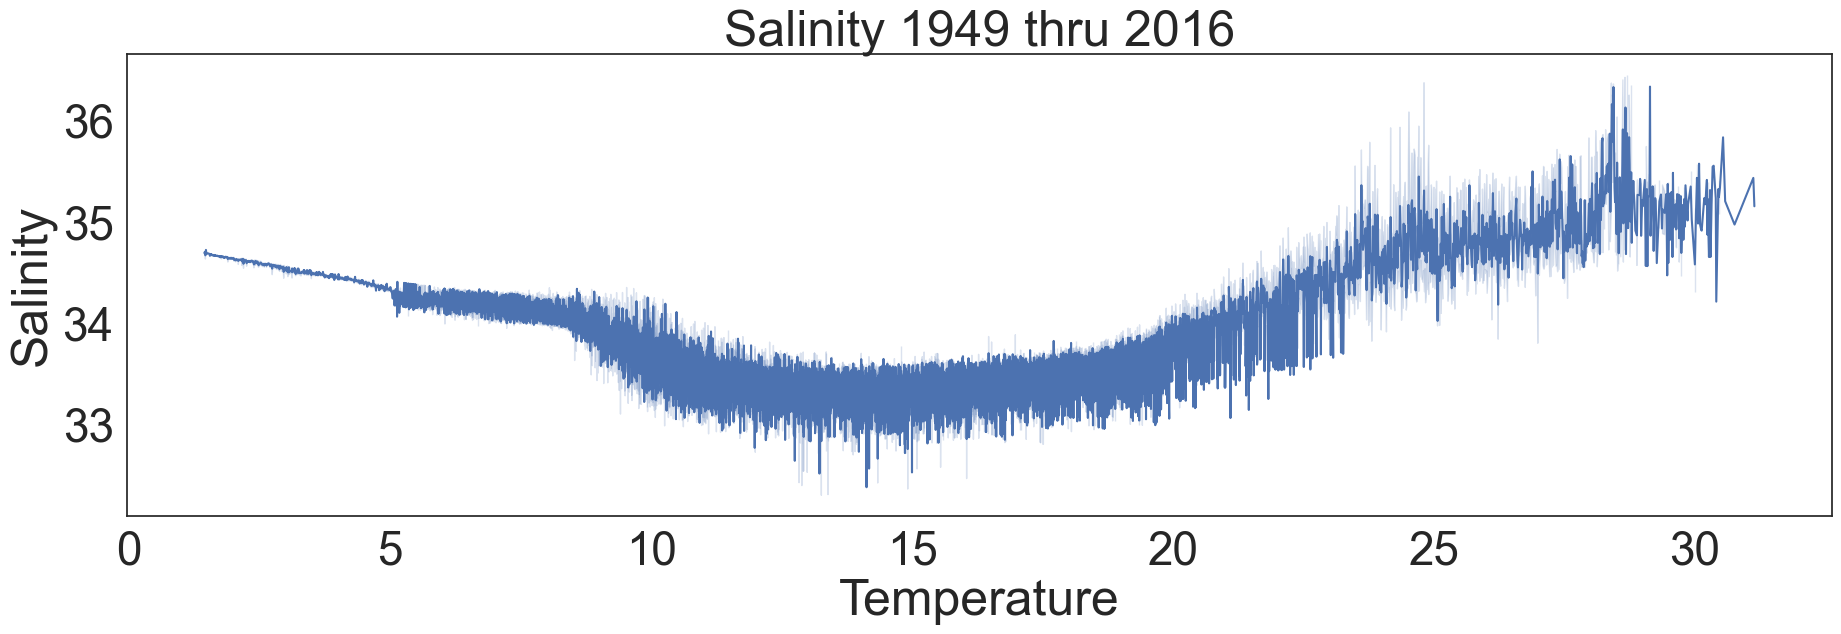

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(22, 10))
sns.lineplot(x='T_degC', y='Salnty', data=df).set(title='Salinity 1949 thru 2016',xlabel='Temperature',ylabel='Salinity')
sns.set_theme(style='white', font_scale=3)
plt.savefig('full_sal_tem_graph.png')

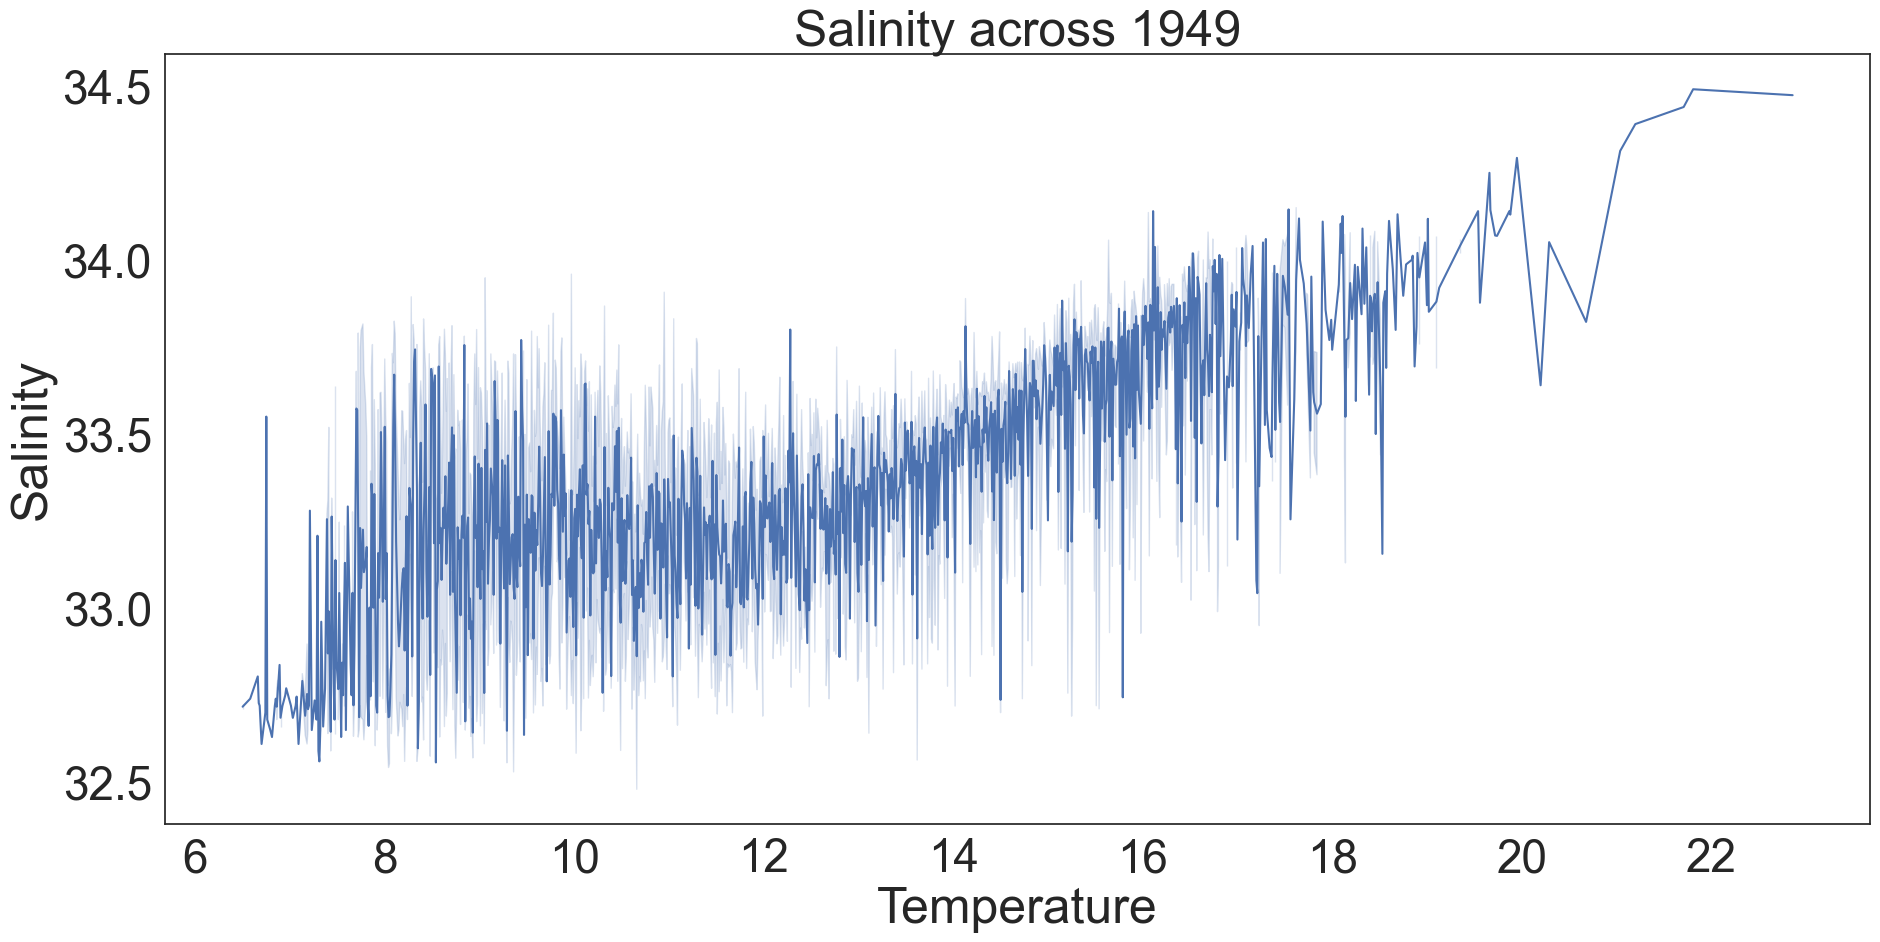

In [41]:
df_1949 = csv_data_new

depth_1 = 50
depth_2 = 100

cond_1 = df_1949.Depthm.between(depth_1,depth_2)
cond_2 = df_1949.date.str.startswith("1949")
cond_3 = (df_1949.Salnty.notnull() & df_1949.T_degC.notnull())
result_1 = df_1949.loc[cond_1 &  cond_2 & cond_3]

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(22, 10))
sns.lineplot(x='T_degC', y='Salnty', data=result_1).set(title='Salinity across 1949',xlabel='Temperature',ylabel='Salinity')
sns.set_theme(style='white', font_scale=3)
plt.savefig('1949_sal_temp_graph.png')

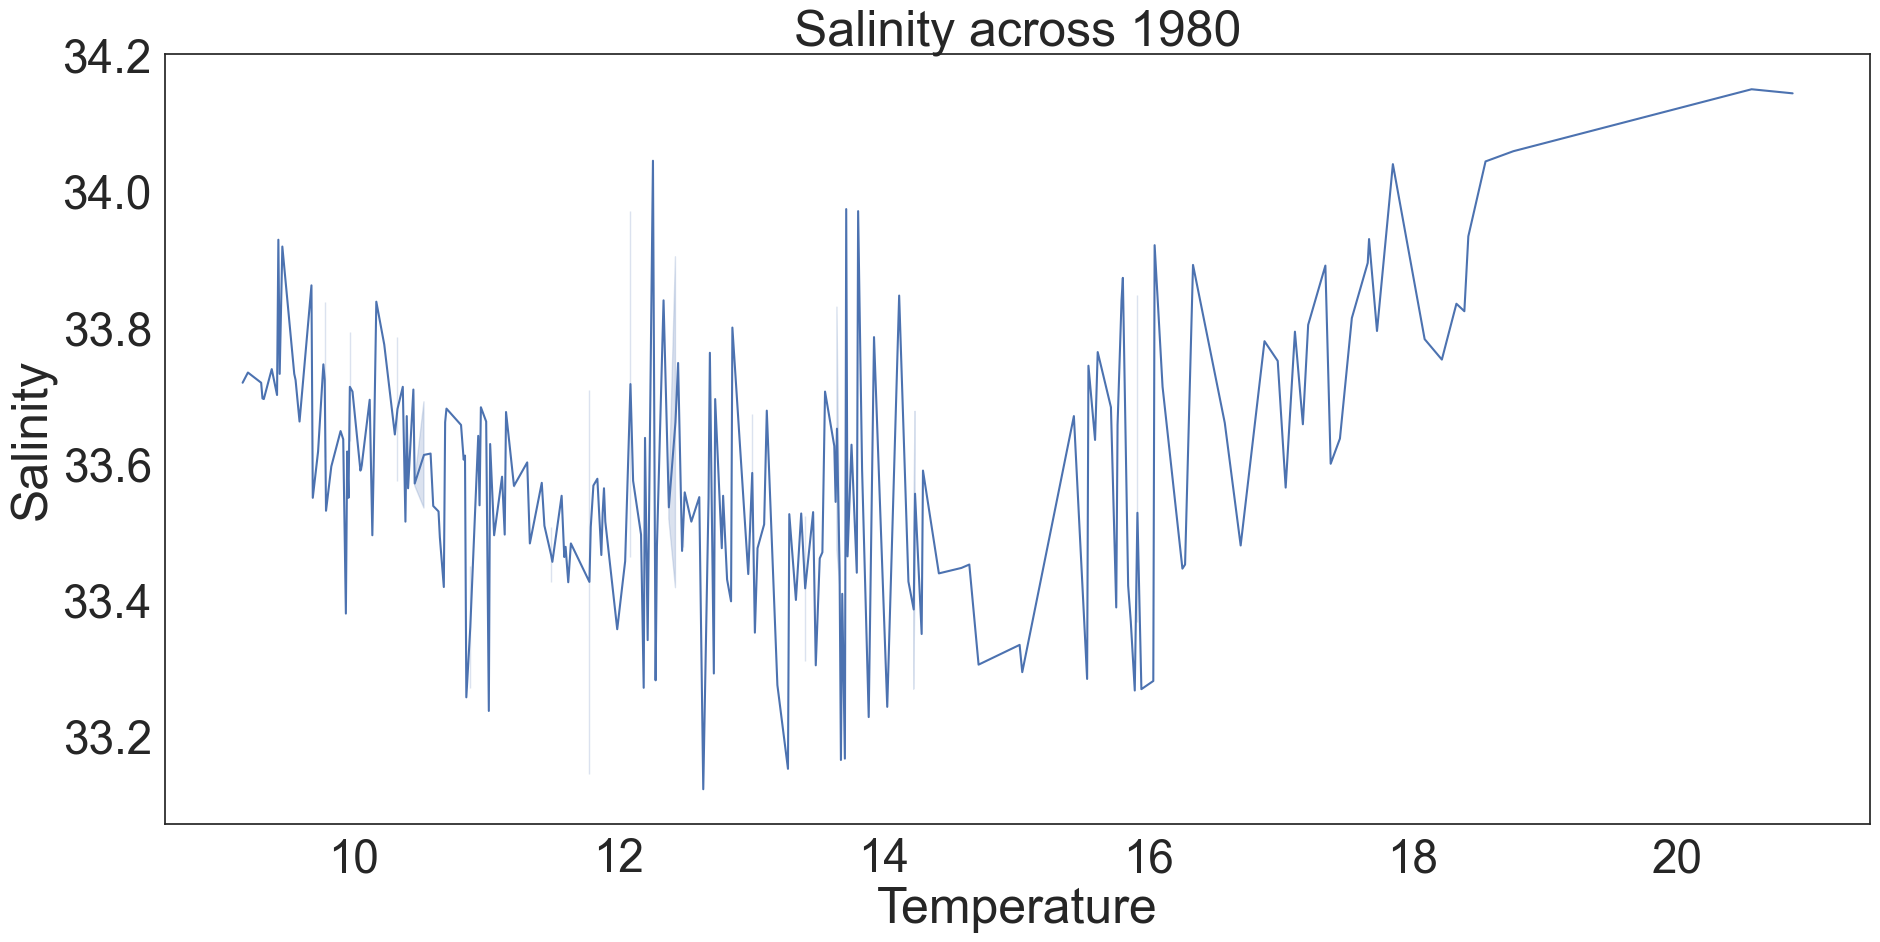

In [40]:
df_1980 = csv_data_new

depth_1 = 50
depth_2 = 100

cond_1 = df_1980.Depthm.between(depth_1,depth_2)
cond_2 = df_1980.date.str.startswith("1980")
cond_3 = (df_1980.Salnty.notnull() & df_1980.T_degC.notnull())
result_1 = df_1980.loc[cond_1 &  cond_2 & cond_3]

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(22, 10))
sns.lineplot(x='T_degC', y='Salnty', data=result_1).set(title='Salinity across 1980',xlabel='Temperature',ylabel='Salinity')
sns.set_theme(style='white', font_scale=3)
plt.savefig('1980_sal_temp_graph.png')

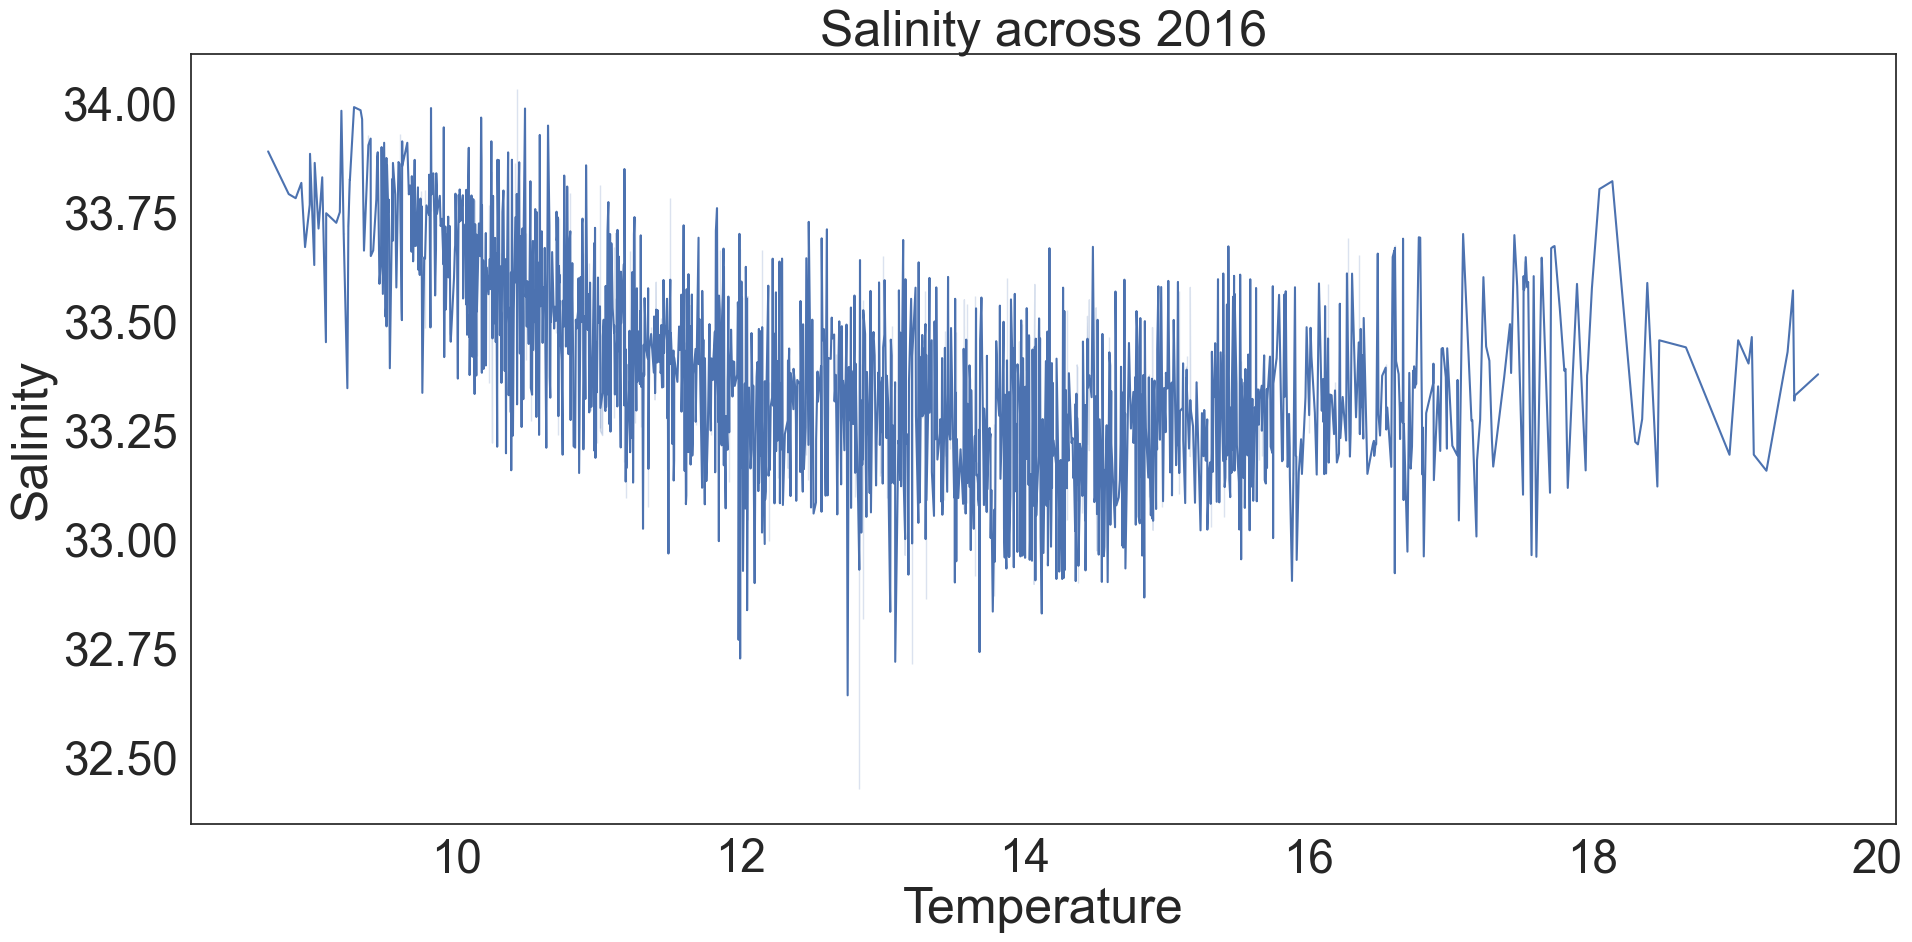

In [42]:
df_2016 = csv_data_new

depth_1 = 50
depth_2 = 100

cond_1 = df_2016.Depthm.between(depth_1,depth_2)
cond_2 = df_2016.date.str.startswith("2016")
cond_3 = (df_2016.Salnty.notnull() & df_2016.T_degC.notnull())
result_1 = df_2016.loc[cond_1 &  cond_2 & cond_3]

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(22, 10))
sns.lineplot(x='T_degC', y='Salnty', data=result_1).set(title='Salinity across 2016',xlabel='Temperature',ylabel='Salinity')
sns.set_theme(style='white', font_scale=3)
plt.savefig('2016_sal_temp_graph.png')

In [27]:
import numpy as np
import pymannkendall as mk
mk.original_test(result['Salnty'],alpha=0.05)



Mann_Kendall_Test(trend='no trend', h=False, p=0.9812464037182178, z=0.023506311888565376, Tau=0.00024297624120939263, s=2109.0, var_s=8042151027.666667, slope=0.0, intercept=33.412)

In [ ]:
df_group = csv_data_new

depth_1 = 50
depth_2 = 100

cond_1 = df_1980.Depthm.between(depth_1,depth_2)
cond_2 = df_1980.date.str.startswith("1980")
cond_3 = (df_1980.Salnty.notnull() & df_1980.T_degC.notnull())
result_1 = df_1980.loc[cond_1 &  cond_2 & cond_3]


C:\Users\ear106\AppData\Local\Temp\ipykernel_12660\2766879894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_1['date'] = pd.to_datetime(result_1['date']).dt.normalize()


In [7]:
def mean_total_year(data_main, target, d1,d2):
    # builds lists based on year
    # inside of a dictionary or a dictionary of lists
    
    # data cleaning of incoming dataframe
    df_group = data_main
    # depth banding 
    depth_1 = d1
    depth_2 = d2
    cond_1 = df_group.Depthm.between(depth_1,depth_2)
    cond_3 = (df_group.Salnty.notnull() & df_group.T_degC.notnull())
    result_inside = df_group.loc[cond_1  & cond_3]

    # pre-set a date for testing
    date_old = '1900'
    new_dic = dict()
    new_list = []

    #for i, row in result_inside.iterrows():
    for i, row in result_inside.head(100000).iterrows():  
        
        date_new = row['date']
        date_string = date_new.split("-")

        # shifts date from old to new
        # 1900 < 1949
        if date_old < date_string[0]:
            date_old = date_string[0]
            new_list.append(row[target])
            new_dic["lst_" + str(date_old)] = new_list
        else:
            new_list.append(row[target])
            new_dic["lst_" + str(date_old)] = new_list   
            
            
    
    return new_dic       

    
blah = mean_total_year(csv_data_new,'T_degC',50,100)
print(blah.keys())
#print(blah['lst_1949'])
#print(len(blah['lst_1949']))

import statistics
statistics.mean(blah['lst_1949'])

dict_keys(['lst_1949', 'lst_1950', 'lst_1951', 'lst_1952', 'lst_1953', 'lst_1954', 'lst_1955', 'lst_1956', 'lst_1957', 'lst_1958', 'lst_1959', 'lst_1960', 'lst_1961', 'lst_1962', 'lst_1963', 'lst_1964', 'lst_1965', 'lst_1966', 'lst_1967', 'lst_1968', 'lst_1969', 'lst_1970', 'lst_1971', 'lst_1972', 'lst_1973', 'lst_1974', 'lst_1975', 'lst_1976', 'lst_1977', 'lst_1978', 'lst_1980', 'lst_1981', 'lst_1982', 'lst_1983', 'lst_1984'])


12.8703916